In [22]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

from warnings import filterwarnings
filterwarnings('ignore')

### Data set "Animals"

[Animals dataset](https://stat.ethz.ch/R-manual/R-patched/library/MASS/html/Animals.html)

Average brain and body weights for 28 species of land animals.

In [23]:
data = pd.read_csv("./Animals.csv", header=0, index_col=0)

In [24]:
data.head()

,body,brain
Mountain beaver,1.35,8.1
Cow,465.00,423.0
Grey wolf,36.33,119.5
Goat,27.66,115.0
Guinea pig,1.04,5.5


In [25]:
data.shape

(28, 2)

- We want to use a linear model to study the relation between the brain weight and the body weight

- Simple linear regression (one predictor):

$brain=\beta_0+\beta_1*body+\varepsilon$


### Regression assumption on Y

- Our model: $Y=\beta_0+\beta_1*x+\varepsilon$

- Given that we assume the errors $\varepsilon$ to have normal distribution $N(0,\sigma^2)$, we assume that also $Y$ are normally distributed.

- Check the assumption on $Y$

- If the response variable is not gaussian, a linear model should not be used.



In [26]:

Q1 = data['brain'].quantile(0.25)
Q3 = data['brain'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]['brain']
outliers

Dipliodocus           50.0
Asian elephant      4603.0
Human               1320.0
African elephant    5712.0
Triceratops           70.0
Brachiosaurus        154.5
Name: brain, dtype: float64

array([[<Axes: title={'center': 'body'}>,
        <Axes: title={'center': 'brain'}>]], dtype=object)

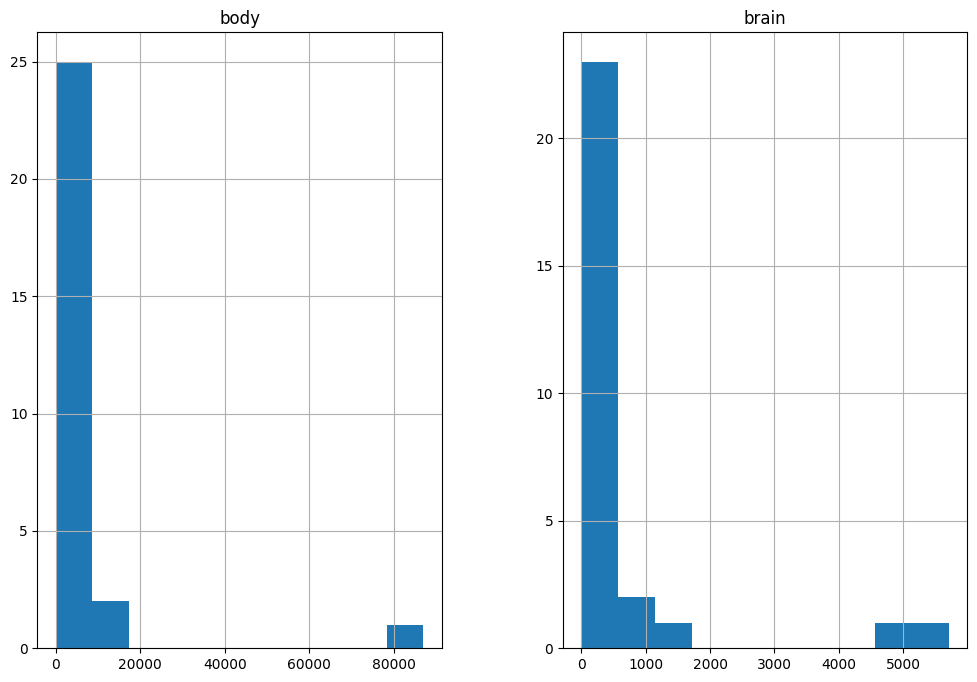

In [27]:
data.hist(figsize=(12,8))

<Axes: >

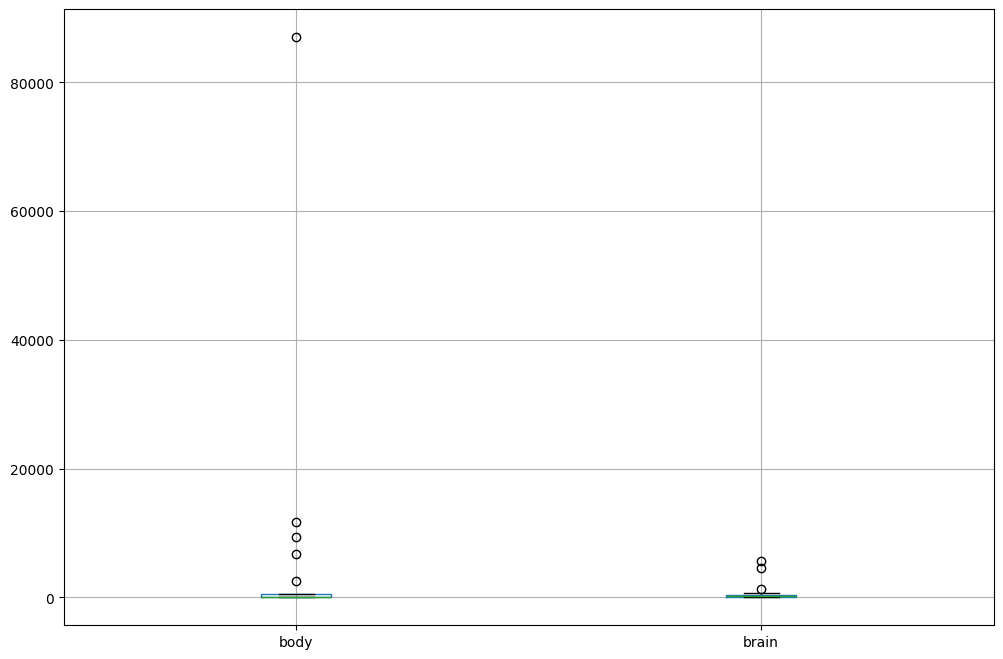

In [28]:
data.boxplot(figsize=(12,8))

### Transformations

Apply the necessary transformations to Y and X (use log tranformation).

In [29]:
data

,body,brain
Mountain beaver,1.350,8.1
Cow,465.000,423.0
Grey wolf,36.330,119.5
Goat,27.660,115.0
Guinea pig,1.040,5.5
Dipliodocus,11700.000,50.0
Asian elephant,2547.000,4603.0
Donkey,187.100,419.0
Horse,521.000,655.0
Potar monkey,10.000,115.0


In [30]:
data['brain'] = np.log(data['brain'])
data['body'] = np.log(data['body']*1000)

### Outliers

Detect the outliers using boxplots, histograms or scatter plots. Findout which are the animals corresponding to the outliers.

In [16]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = data[((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
outliers

,body,brain


## Linear regression 1

Apply a simple linear regression using the model:

$\log(brain)=\beta_0+\beta_1*log(body)+\varepsilon $

In [17]:
# Definir la variable dependiente (y) y la variable independiente (x)
y = data['brain']
x = data['body']

# Agregar una constante (ordenada en el origen) a la variable independiente
x = sm.add_constant(x)

# Ajustar el modelo de regresión lineal
model_1 = sm.OLS(y, x).fit()

print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  brain   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     40.26
Date:                Fri, 29 Aug 2025   Prob (F-statistic):           1.02e-06
Time:                        21:30:59   Log-Likelihood:                -50.629
No. Observations:                  28   AIC:                             105.3
Df Residuals:                      26   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8713      0.884     -0.986      0.3

Denoting with $Y_i$ the observations and with $\hat{Y_i}$ the estimations, the residuals are:

$residuals=|Y_i-\hat{Y_i}|$


Draw an histogram of the residuals and a scatter plot of residuals vs fittedvalues. Do the plots suggest a proper residual behavior?

Draw the regression line on the X,Y scatter plot.

### Dummy variables (Feature engineering)

Should I treat dinosaurs independently? One can make the dataset more interesting introducing dummy variables, one for each type of dinosaurs.

Create four dummy variables: one for Triceratops, one for Dipliodocus, one for Brachiosaurus and one for dinosaur in general.


### Regression model with dummy variables: Linear regression 2

- New model with extra predictors:

$log(brain)=\beta_0+\beta_1*log(body)+\beta_2*DummyT+\beta_3*DummyD+\beta_4*DummyB+\varepsilon$

- A different intercept if it is a dinosaur. Suppose the animal is a triceratop: the variable DummyT is equal to 1, DummyD=DummyB=0.

$\log(brain)=\beta_0+\beta_1*log(body)+\beta_2=$

$(\beta_0+\beta_2)+\beta_1*log(body)$

The intercept is $\beta_0$ when the animal is not a triceratop, while it's $\beta_0+\beta_2$ when the animal is a triceratop.

With this model we consider three different intercepts for the three dinosaurs.



In [10]:
dinosaurs = ['Triceratops', 'Dipliodocus', 'Brachiosaurus']
data['type'] = np.nan

for dinosaur in dinosaurs:
    data.loc[data.index == dinosaur, 'type'] = dinosaur

for dinosaur in dinosaurs:
    data[dinosaur] = (data['type'] == dinosaur).astype(int)

data['type'].fillna(0, inplace=True)

x = data[['body', 'Triceratops', 'Dipliodocus', 'Brachiosaurus']]
y = data['brain']

x = sm.add_constant(x)

model_2 = sm.OLS(y, x).fit()

print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  brain   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     68.00
Date:                Fri, 29 Aug 2025   Prob (F-statistic):           2.10e-12
Time:                        21:31:13   Log-Likelihood:                -28.004
No. Observations:                  28   AIC:                             66.01
Df Residuals:                      23   BIC:                             72.67
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -3.0460      0.477     -6.387

### Linear regression 3

- Model 2: same rate of change, but different intercept for dinasaurs

 $log(brain)=\beta_0+\beta_1*log(body)+\beta_2*Dino+\varepsilon$

 For an animal different from a dinosaur, the intercept is $\beta_0$. For a dinosaur the intercept is $\beta_0+\beta_2$.




In [11]:
data['is_dino'] = (data['type'] != 0).astype(int)

x = data[['body', 'is_dino']]
y = data['brain']

x = sm.add_constant(x)

model_3 = sm.OLS(y, x).fit()

print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  brain   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     142.9
Date:                Fri, 29 Aug 2025   Prob (F-statistic):           2.09e-14
Time:                        21:31:16   Log-Likelihood:                -28.446
No. Observations:                  28   AIC:                             62.89
Df Residuals:                      25   BIC:                             66.89
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0092      0.462     -6.511      0.0

### Linear regression 4

 Different intercept and slope for dinosaurs. We add the feature where we multiply the variables "Dino" and "log(body)".

 $log(brain)=\beta_0+\beta_1*log(body)+\beta_2*Dino+\beta_3*log(body)*Dino+\varepsilon$

For an animal other than a dinosaur, the intercept is $\beta_0$ and the slope $\beta_1$. For a dinosaur, the intercept is $\beta_0+\beta_2$ and the slope is $\beta_1+\beta_3$.

Which is the best model?

In [20]:
data['mult_dino_body'] = data['is_dino'] * data['body']

x = data[['body', 'is_dino', 'mult_dino_body']]
y = data['brain']

x = sm.add_constant(x)

model_4 = sm.OLS(y, x).fit()

print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  brain   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     93.82
Date:                Fri, 29 Aug 2025   Prob (F-statistic):           2.15e-13
Time:                        21:30:59   Log-Likelihood:                -28.113
No. Observations:                  28   AIC:                             64.23
Df Residuals:                      24   BIC:                             69.55
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -3.0460      0.469     -6.

ANOVA

In [21]:

# anova_lm


from scipy import stats
f_statistic, p_value = stats.f_oneway(data[data['type'] == 'Triceratops']       ['brain'],
                                      data[data['type'] == 'Dipliodocus']['brain'],
                                      data[data['type'] == 'Brachiosaurus']['brain'])

print(f'Estadístico F: {f_statistic}')
print(f'Valor p: {p_value}')

Estadístico F: nan
Valor p: nan


In [22]:
df = data[['brain','type']].dropna().copy()
df['brain'] = df['brain'].astype(float)
modelo = smf.ols('brain ~ C(type)', data=df).fit()
tabla = sm.stats.anova_lm(modelo, typ=2)  # ANOVA de tipo II
print(tabla)

              sum_sq    df         F    PR(>F)
C(type)     0.673059   3.0  0.034794  0.991072
Residual  154.753953  24.0       NaN       NaN


In [23]:
print(model_1.params, '\n\n', model_2.params, '\n\n',model_3.params, '\n\n',model_4.params)

const   -0.871312
body     0.495995
dtype: float64 

 const           -3.046021
body             0.752261
Triceratops     -4.783948
Dipliodocus     -5.285074
Brachiosaurus   -5.666178
dtype: float64 

 const     -3.009176
body       0.748553
is_dino   -5.219351
dtype: float64 

 const            -3.046021
body              0.752261
is_dino           0.059269
mult_dino_body   -0.314407
dtype: float64


In [24]:
from statsmodels.stats.anova import anova_lm
anova = anova_lm(model_1, model_3, model_4, model_2)
anova

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,26.0,60.987988,0.0,NaN,NaN,NaN
1,25.0,12.505428,1.0,48.482560,92.024838,7.367435e-10
2,24.0,12.211564,1.0,0.293863,0.557782,4.624095e-01
3,23.0,12.117369,1.0,0.094196,0.178793,6.763398e-01


In [44]:
# prediction!

caballo_peso = {
    'id': 'caballo',
    'body': 450
}

def input_transformer(X : dict):
    X_df = pd.DataFrame(X, index=[X['id']])
    X_df['body'] = np.log(X_df['body']*1000)
    X_df.columns = ['id', 'body']
    X_df.set_index('id', inplace=True)
    X_df.insert(0, 'const', 1.0)
    X_df['is_dino'] = 0
    return (X_df)
    
    
print('La predicción del peso del cerebro es:',float(np.exp((model_3.predict(input_transformer(caballo_peso)).values))))

La predicción del peso del cerebro es: 841.1199818179246
